# 0. Importing libraries

In [52]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../Functions")
import warnings
warnings.filterwarnings(action = 'ignore')
import custom_functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

plt.style.use('ggplot')
## Change title size of a plot
mpl.rcParams['axes.titlesize'] = 22
# Figure size
mpl.rc("figure", figsize = (15,7))
## Change label size(x and y) of a plot
mpl.rcParams['axes.labelsize'] = 18
## Change xticks size of a plot
mpl.rcParams['xtick.labelsize'] = 16
## Change yticks size of a plot
mpl.rcParams['ytick.labelsize'] = 16

# 1. Loading data

In [12]:
# loading csv file as a dataframe
data = pd.read_csv("DATA/bank-full.csv", sep = ";")

# 2. Data exploring

In [13]:
# Number of observations and variables
data.shape

(45211, 17)

In [14]:
# List of variables
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## What variables represent?

### Bank Client Data

1 - age (**numeric**)

2 - job : type of job (**categorical**: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student",
                        "blue-collar", "self-employed", "retired", "technician", "services") 

3 - marital : marital status (**categorical**: "married", "divorced", "single"; note: "divorced" means divorced or widowed)

4 - education (**categorical**: "unknown", "secondary", "primary", "tertiary")

5 - default: has credit in default? (**binary**: "yes", "no")

6 - balance: average yearly balance, in euros (**numeric**) 

7 - housing: has housing loan? (**binary**: "yes", "no")

8 - loan: has personal loan? (**binary**: "yes", "no")

### Related with the last contact of the current campaign:

9 - contact: contact communication type (**categorical**: "unknown", "telephone", "cellular") 

10 - day: last contact day of the month (**numeric**)

11 - month: last contact month of year (**categorical**: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (**numeric**)

### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (**numeric**, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (**numeric**, -1 means client
was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (**numeric**)

16 - poutcome: outcome of the previous marketing campaign (**categorical**: "unknown", "other", "failure", "success")

### Output variable (desired target):
17 - y - has the client subscribed a term deposit? (**binary**: "yes", "no")

In [18]:
# Information about the dataframe
# null_counts = true, will not count rows which have missing values in it.
data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# Checking for missing values
data.isna().all()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

There are no missing values in any variables as mentioned by the data owner now I can carry out initial exploration using visualization after splitting data into 3 groups(training, validation and testing). 

### Splitting the data

In [43]:
shuffled_data = shuffle(data, random_state = 73).reset_index(drop = True)

# Splitting the dataframe in train, validate and test
## Reference - https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.split.html
train_df, validate_df, test_df = np.split(
                                          shuffled_data.sample(frac = 1), 
                                          [ int( 0.8 * len(shuffled_data) ), int( 0.9 * len(shuffled_data) ) ] 
                                         )

In [48]:
print("Training set : ", train_df.shape)
print("Validation set : ", validate_df.shape)
print("Testing set : ", test_df.shape)

Training set :  (36168, 17)
Validation set :  (4521, 17)
Testing set :  (4522, 17)


## Data Summaries and Visualizations

### age

In [50]:
train_df["age"].describe()

count    36168.000000
mean        40.938288
std         10.631027
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

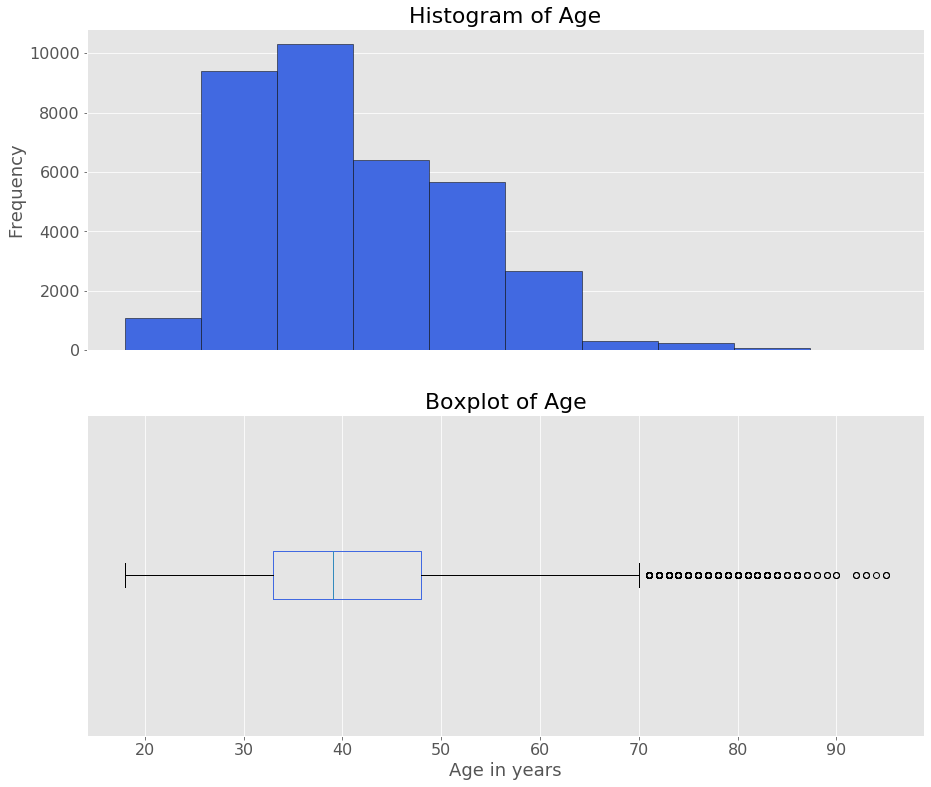

In [53]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(train_df["age"], "Age", color = "royalblue", ylabel = "Frequency", 
                                               xlabel = "Age in years" , size = (15,13))

In [64]:
print("Number of outliers :", train_df[train_df["age"] > 70].shape[0])

Number of outliers : 388


Distribution is right skewed which makes sense as there should be less participation from old people in such term deposit plan that's why there are outliers in the data. 388 Observations where age is greater than 70 years(BY looking at the boxplot right hand whisker) are outliers, which is reasonable amount.

### job